In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
WEIGHT_LIST = [2,5,18,3,2,5,10,4,8,12,5,10,7,15,11,2,8,10,5,9]#每个物品的重量列表
COST_LIST = [5,10,12,4,3,11,13,10,7,15,8,19,1,17,12,9,15,20,2,6]#每个物品的代价列表
WEIGHT_LIMIT = 40#背包容量
POPSIZE_LIMIT = 200
CHROMOSOME_SIZE = len(WEIGHT_LIST)

gen=300#迭代次数 世代交代回数
init_probability = 0.2#初始化时取1的概率 初期化時に1をとる確率
select_proportion = 0.4#选择比例 選択割合
crossover_proportion = 1#交叉概率 交叉確率
mutation_probability = 0.1#变异概率 突然変異確率
popsize=100#种群大小 集団の大きさ


In [3]:
weight = [2,5,18,3,2,5,10,4,8,12,5,10,7,15,11,2,8,10,5,9]
value = [5,10,12,4,3,11,13,10,7,15,8,19,1,17,12,9,15,20,2,6]
CAPACITY = 40
NUM = len(weight)

def knapsack():
    optimal = [0 for x in range(CAPACITY + 1)]
    for i in range(0, NUM):
        for j in range(CAPACITY, weight[i] - 1, -1):
            optimal[j] = max(optimal[j], optimal[j - weight[i]] + value[i])
    print("\nthe optimal solution is:" + str(optimal[CAPACITY]) + "\n")

knapsack()


the optimal solution is:87



In [4]:
data_df = pd.DataFrame({'id':list(range(0,20)), 'weight':WEIGHT_LIST, 'value':COST_LIST})
data_df

,id,weight,value
0,0,2,5
1,1,5,10
2,2,18,12
3,3,3,4
4,4,2,3
5,5,5,11
6,6,10,13
7,7,4,10
8,8,8,7
9,9,12,15


In [5]:
def init(popsize, CHROMOSOME_SIZE, init_probability):
    chromosome_list = []
    for i in range(popsize):
        temp = []
        for j in range(CHROMOSOME_SIZE):
            x = np.random.choice([0,1], 1, p = [1-init_probability, init_probability])
            temp += list(x)
        chromosome_list.append(temp)
    return chromosome_list

def finess_weight_calculation(chromosome_list):
    fitness_list = []
    weight_list = []
    for x in chromosome_list:
        fitness_list.append(sum(np.multiply(x, COST_LIST)))
        weight_list.append(sum(np.multiply(x, WEIGHT_LIST)))
    return fitness_list,weight_list

def weed_out(chromosome_list, fitness_list, weight_list, select_proportion, POPSIZE_LIMIT, popsize):
    #step1 删除重量超过Weight_limit的染色体
    out_index = [i for i in range(popsize) if weight_list[i] > WEIGHT_LIMIT]#找到大于wl的索引列表
    #weight_list = [j for i,j in enumerate(weight_list) if i not in out_index]#根据索引列表删除对应索引元素
    fitness_list = [j for i,j in enumerate(fitness_list) if i not in out_index]
    chromosome_list = [j for i,j in enumerate(chromosome_list) if i not in out_index]
    popsize = len(fitness_list)
    #step2 根据fitness大小确定一个概率值，根据这个概率去选择染色体
    select_num = round(popsize * select_proportion)
    if select_num > POPSIZE_LIMIT:
        select_num = POPSIZE_LIMIT
    select_probability = [i/sum(fitness_list) for i in fitness_list]#概率
    select_index = np.random.choice(list(range(popsize)), size = select_num, p = select_probability)#轮盘赌
    #print(select_probability)
    #print(select_index)
    chromosome_list = [chromosome_list[i] for i in select_index]
    
    return chromosome_list

def crossover(chromosome_list, crossover_proportion, CHROMOSOME_SIZE, popsize):
    cross_pos = round(CHROMOSOME_SIZE / 2)
    child_list = []
    for i in range(round(popsize * crossover_proportion)):
        temp = list(range(popsize))
        parent_1_index = np.random.choice(temp)
        parent_1 = chromosome_list[parent_1_index]
        temp.pop(parent_1_index)
        parent_2_index = np.random.choice(temp)#不重复选
        parent_2 = chromosome_list[parent_2_index]
        child_1 = parent_1[:cross_pos] + parent_2[cross_pos:]
        child_2 = parent_2[:cross_pos] + parent_1[cross_pos:]
        child_list.append(child_1)
        child_list.append(child_2)
    return child_list

def mutation(child_list, mutation_probability,CHROMOSOME_SIZE):
    for x in child_list:
        mutation_pos = np.random.choice(CHROMOSOME_SIZE)
        mutation_flag = np.random.choice([0,1],size = 1, p = [1 - mutation_probability, mutation_probability])#0不变，1变
        #print(mutation_flag)
        if mutation_flag:
            if x[mutation_pos] == 1:
                x[mutation_pos] = 0
            else:
                x[mutation_pos] = 1
    return child_list

In [6]:
chromosome_list = init(popsize, CHROMOSOME_SIZE, init_probability)
history_max = []
history_avg = []
max_fitness = 0
for i in range(gen):
    print("gen: ",i," size: ",popsize)
    fitness_list, weight_list = finess_weight_calculation(chromosome_list)
    chromosome_list = weed_out(chromosome_list, fitness_list, weight_list, select_proportion, POPSIZE_LIMIT, popsize)
    popsize = len(chromosome_list)
    h_fitness,h_weight = finess_weight_calculation(chromosome_list)
    history_avg.append(np.average(h_fitness))
    temp = max(h_fitness)
    history_max.append(temp)
    if temp > max_fitness:
        max_fitness = temp
        max_chromosome = chromosome_list[h_fitness.index(temp)]
    child_list = crossover(chromosome_list, crossover_proportion, CHROMOSOME_SIZE, popsize)
    child_list = mutation(child_list, mutation_probability,CHROMOSOME_SIZE)
    chromosome_list = chromosome_list + child_list
    popsize = len(chromosome_list)
print("final solution : ",[i for i,j in enumerate(max_chromosome) if j], " final value: ", max_fitness)
    

gen:  0  size:  100
gen:  1  size:  96
gen:  2  size:  99
gen:  3  size:  105
gen:  4  size:  117
gen:  5  size:  123
gen:  6  size:  138
gen:  7  size:  153
gen:  8  size:  174
gen:  9  size:  195
gen:  10  size:  222
gen:  11  size:  258
gen:  12  size:  294
gen:  13  size:  339
gen:  14  size:  396
gen:  15  size:  462
gen:  16  size:  537
gen:  17  size:  600
gen:  18  size:  600
gen:  19  size:  600
gen:  20  size:  600
gen:  21  size:  600
gen:  22  size:  600
gen:  23  size:  600
gen:  24  size:  600
gen:  25  size:  600
gen:  26  size:  600
gen:  27  size:  600
gen:  28  size:  600
gen:  29  size:  600
gen:  30  size:  600
gen:  31  size:  600
gen:  32  size:  600
gen:  33  size:  600
gen:  34  size:  600
gen:  35  size:  600
gen:  36  size:  600
gen:  37  size:  600
gen:  38  size:  600
gen:  39  size:  600
gen:  40  size:  600
gen:  41  size:  600
gen:  42  size:  600
gen:  43  size:  600
gen:  44  size:  600
gen:  45  size:  600
gen:  46  size:  600
gen:  47  size:  600
gen:

Text(0, 0.5, 'the optimal solution value of each generation')

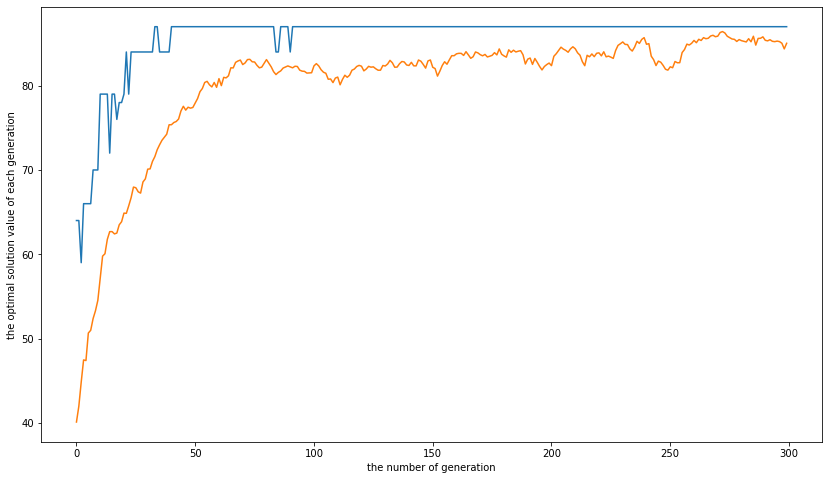

In [7]:
plt.figure(figsize=(14,8))
plt.plot(history_max)
plt.plot(history_avg)
plt.xlabel('the number of generation')
plt.ylabel('the optimal solution value of each generation')